In [263]:
#!pip install tensorflow
#!pip install keras

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [265]:
from tensorflow import keras

In [266]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [267]:
df =pd.read_csv("D:\\pyt\\Assignment\\Assignment 16-Neural Networks\\forestfires.csv")
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [268]:
# As Dummy variables are already given for month and day in data set, lets drop month and day
df= df.drop(["month", "day"], axis=1)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [269]:
df.shape

(517, 29)

In [270]:
df.info() # It can be seen that there is no Null value in data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [271]:
X = df.drop("size_category", axis=1)
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [272]:
y= pd.DataFrame({"size_category" : df.iloc[:, -1]})
y

,size_category
0,small
1,small
2,small
3,small
4,small
...,...
512,large
513,large
514,large
515,small


In [273]:
# lets check for proportion of values for small and large catagory
y.value_counts()/len(y)

size_category
small            0.731141
large            0.268859
dtype: float64

In [274]:
# it can be seen that small catagory is almost 73 % and large is 26 %,
# so handling this imbalance by resampling

In [275]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [276]:
x_resampled, y_resampled = RandomOverSampler().fit_resample(X, y)

In [277]:
print(x_resampled.shape)
print(y_resampled.shape)

(756, 28)
(756, 1)


In [278]:
y_resampled.value_counts()

size_category
large            378
small            378
dtype: int64

In [279]:
y_resampled["size_category"]=y_resampled["size_category"].map({"small":0, "large":1})

In [280]:
# Using Test train slpit
from sklearn.model_selection import train_test_split

In [281]:
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

In [282]:
# Applying Standard scalar on the data
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
X_train = scaled.fit_transform(X_train)
X_test = scaled.transform(X_test)

# Applyig Neural network

In [283]:
#Initialising ANN
classifier = Sequential()

# Adding the input layer and first hidden layer 
classifier.add(Dense(units=30, kernel_initializer= "he_uniform", activation= "relu", input_dim=28 ))
classifier.add(Dropout(0.2))

# Adding second hidden layer
classifier.add(Dense(units=20, kernel_initializer= "he_uniform", activation= "relu"))
classifier.add(Dropout(0.2))

classifier.add(Dense(units=10, kernel_initializer= "he_uniform", activation= "relu"))
classifier.add(Dropout(0.2))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer= "glorot_uniform", activation= "sigmoid"))


# Compling the ANN
classifier.compile(optimizer= "adam", loss="binary_crossentropy", metrics= ["accuracy"])

In [284]:
# Fitting the ANN on training data set
model_history = classifier.fit(X_train, y_train, validation_split=0.2, batch_size=10, epochs=120)

Epoch 1/120
43/43 [==============================] - 1s 6ms/step - loss: 0.8626 - accuracy: 0.5532 - val_loss: 0.7355 - val_accuracy: 0.5189
Epoch 2/120
43/43 [==============================] - 0s 2ms/step - loss: 0.7657 - accuracy: 0.5248 - val_loss: 0.6672 - val_accuracy: 0.6038
Epoch 3/120
43/43 [==============================] - 0s 2ms/step - loss: 0.7725 - accuracy: 0.5130 - val_loss: 0.6564 - val_accuracy: 0.5849
Epoch 4/120
43/43 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5603 - val_loss: 0.6539 - val_accuracy: 0.5943
Epoch 5/120
43/43 [==============================] - 0s 2ms/step - loss: 0.7034 - accuracy: 0.5201 - val_loss: 0.6482 - val_accuracy: 0.6038
Epoch 6/120
43/43 [==============================] - 0s 2ms/step - loss: 0.6430 - accuracy: 0.5981 - val_loss: 0.6533 - val_accuracy: 0.6132
Epoch 7/120
43/43 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.6217 - val_loss: 0.6490 - val_accuracy: 0.6038
Epoch 8/120
4

Epoch 59/120
43/43 [==============================] - 0s 2ms/step - loss: 0.3263 - accuracy: 0.8676 - val_loss: 0.3054 - val_accuracy: 0.8585
Epoch 60/120
43/43 [==============================] - 0s 2ms/step - loss: 0.2982 - accuracy: 0.8652 - val_loss: 0.3173 - val_accuracy: 0.8774
Epoch 61/120
43/43 [==============================] - 0s 2ms/step - loss: 0.3292 - accuracy: 0.8700 - val_loss: 0.3170 - val_accuracy: 0.8491
Epoch 62/120
43/43 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8629 - val_loss: 0.3037 - val_accuracy: 0.8774
Epoch 63/120
43/43 [==============================] - 0s 2ms/step - loss: 0.2728 - accuracy: 0.8936 - val_loss: 0.3034 - val_accuracy: 0.8774
Epoch 64/120
43/43 [==============================] - 0s 2ms/step - loss: 0.2827 - accuracy: 0.8747 - val_loss: 0.3165 - val_accuracy: 0.8302
Epoch 65/120
43/43 [==============================] - 0s 2ms/step - loss: 0.2717 - accuracy: 0.8936 - val_loss: 0.3578 - val_accuracy: 0.8302
Epoch 

In [285]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


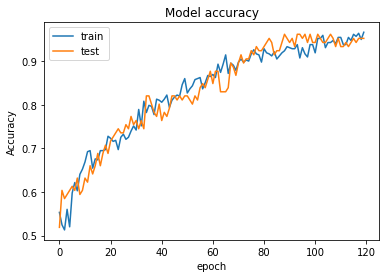

In [286]:
# summary of History for accuracy
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

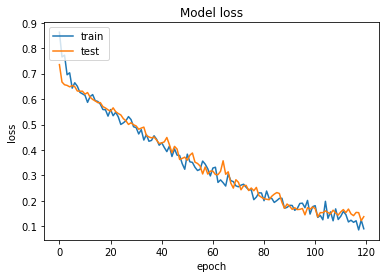

In [287]:
# summary of History for loss
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [301]:
# Predicting the test 
y_pred = classifier.predict(X_test)
def binary_convert(data):
    data1=[]
    i=0
    for i in range (len(data)):
        if data[i] >= 0.5:
            data[i] = int(1)
        else:
            data[i] = int(0)
        data1.append(data[i])
        i+=1
    return data1

In [302]:
y_pred1= binary_convert(y_pred)

In [310]:
y_pred1 = pd.DataFrame(y_pred1)
y_pred1.columns = ["Predicted"]
y_pred1.value_counts()

Predicted
0.0          114
1.0          113
dtype: int64

In [304]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [305]:
confusion_matrix(y_test, y_pred1)

array([[110,  11],
       [  4, 102]], dtype=int64)

In [306]:
accuracy_score(y_test, y_pred1)

0.933920704845815

In [307]:
y_test.value_counts()

size_category
0                121
1                106
dtype: int64

In [327]:
y_test = y_test.reset_index(drop=True)
y_test.columns= ["Actual"]

In [328]:
comp= pd.concat([y_test, y_pred1], axis=1)
comp

,Actual,Predicted
0,1,1.0
1,0,0.0
2,0,1.0
3,1,1.0
4,1,1.0
...,...,...
222,1,1.0
223,0,0.0
224,0,0.0
225,1,1.0


In [329]:
comp['Actual']= comp['Actual'].map({1:"Large", 0: "Small"})
comp['Predicted']= comp['Predicted'].map({1:"Large", 0: "Small"})

In [330]:
comp

,Actual,Predicted
0,Large,Large
1,Small,Small
2,Small,Large
3,Large,Large
4,Large,Large
...,...,...
222,Large,Large
223,Small,Small
224,Small,Small
225,Large,Large


In [334]:
confusion_mat = pd.crosstab(comp['Actual'],comp['Predicted'] )
confusion_mat 

Predicted,Large,Small
Actual,,
Large,102,4
Small,11,110
